In [14]:
#Loading Data set

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/Users/balajipavan/Desktop/PDS Project/Data Set/training_dataset.csv")

In [15]:
#First Five rows
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [30]:
df['Personality (Class label)'].value_counts()

serious        160
extraverted    150
dependable     138
lively         134
responsible    126
Name: Personality (Class label), dtype: int64

In [16]:
df.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,19.685472,5.019746,4.647391,4.643159,4.827927,4.409027
std,2.510672,1.519052,1.658673,1.703569,1.632564,1.567404
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,8.000000,8.000000,8.000000,7.000000


In [17]:
df["Gender"].value_counts()

df.dropna(inplace=True)
#there is outlier value ie 5 instead of gender 
# drop rows with invalid Gender value
df = df[df['Gender'] != '5']

In [18]:
#Distribution Plots

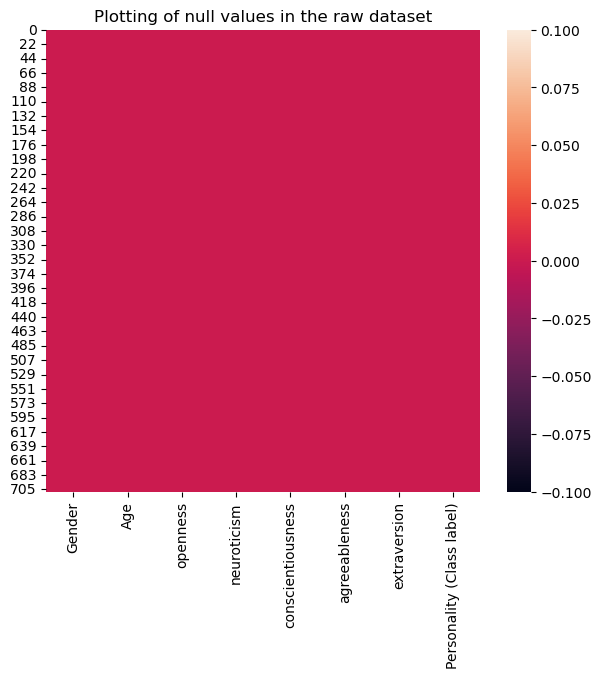

In [29]:
import seaborn as sns

plt.figure(figsize = (7,6))
sns.heatmap(df.isnull())
plt.title("Plotting of null values in the raw dataset")
plt.show()

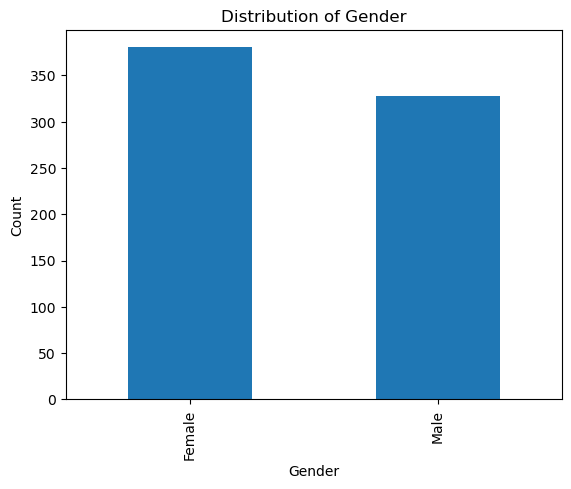

In [19]:
gender_counts = df['Gender'].value_counts()
# Plot a bar chart of the gender distribution
gender_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [20]:
""" As the corresponding values of gender ar nearly same ML models could work better"""

' As the corresponding values of gender ar nearly same ML models could work better'

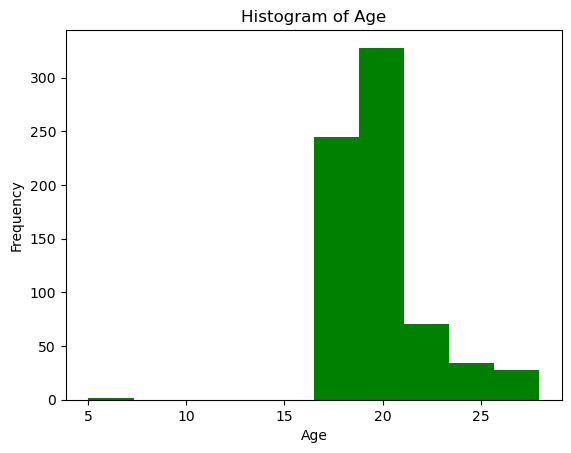

In [21]:
# plot histogram of age column
plt.hist(df['Age'], bins=10, color='green')

# set labels and title for the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# show the plot
plt.show()

In [ ]:
(mean-2sigma,mean+2sigma)  
2sigma ->95%
3sigma(13.5,26.5)->97%

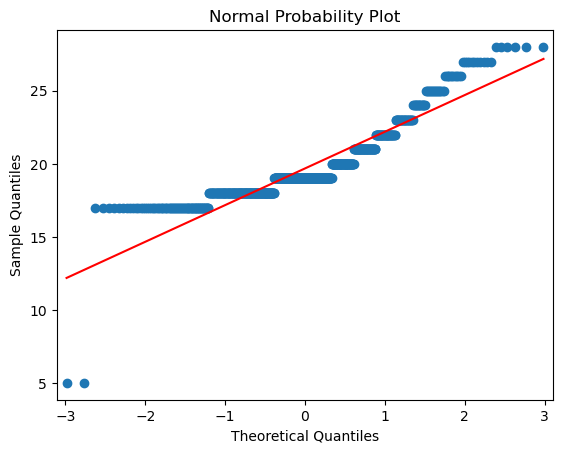

In [22]:
import statsmodels.api as sm

# create a normal probability plot of age column
sm.qqplot(df['Age'], line='s')

# set labels and title for the plot
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Probability Plot')

# show the plot
plt.show()

In [23]:
"""Most of the people are in age between 15 to 25 The distribution seems to be normal and verified from above QQPLot"""

'Most of the people are in age between 15 to 25 The distribution seems to be normal and verified from above QQPLot'

In [31]:
df.isnull()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
704,False,False,False,False,False,False,False,False
705,False,False,False,False,False,False,False,False
706,False,False,False,False,False,False,False,False
707,False,False,False,False,False,False,False,False


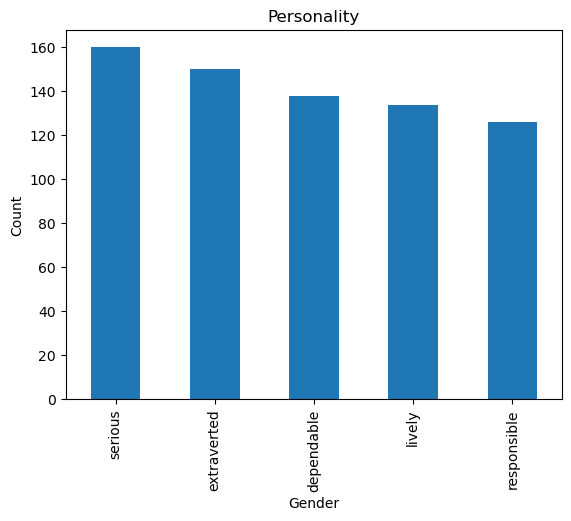

In [24]:
gender_counts = df['Personality (Class label)'].value_counts()
# Plot a bar chart of the gender distribution
gender_counts.plot(kind='bar')
plt.title('Personality')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [25]:
""" All of labels are almost in equal distribution so no problem while applying ml model such that it doesn't get overfit"""

" All of labels are almost in equal distribution so no problem while applying ml model such that it doesn't get overfit"

In [26]:
df.isna().any()

Gender                       False
Age                          False
openness                     False
neuroticism                  False
conscientiousness            False
agreeableness                False
extraversion                 False
Personality (Class label)    False
dtype: bool

In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# suppress warnings
warnings.filterwarnings('ignore')

df.dropna(inplace=True)


df['Gender'] = df['Gender'].replace({1: 'Male', 2: 'Female'})
# separate the features and target into two data frames
X = df.drop(['Personality (Class label)', 'Gender'], axis=1)
y = df['Personality (Class label)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the models
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier()}
for name, model in models.items():
    model.fit(X_train, y_train)

    # evaluate the performance of the models on the testing set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: {accuracy:.2f}')


Logistic Regression: 0.18
Decision Tree: 0.33
